<a href="https://colab.research.google.com/github/LowellMasibo/Medical--Charge-Prediction/blob/main/Medical_Charge_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My Capstone project assignment


*   Medical insurance prediction model
*   Kaggle dataset




In [ ]:
%cd /content/drive/MyDrive/MyST1_CapstoneProject

/content/drive/MyDrive/MyST1_CapstoneProject


In [ ]:
!ls /content/drive/MyDrive/MyST1_CapstoneProject

DataForML.pkl  Final_KNN_Model.pkl  Medical_insurance.csv


# 1. Reading data from the dataset


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
medical_insurance =pd.read_csv('/content/drive/MyDrive/MyST1_CapstoneProject/Medical_insurance.csv')
print('Shape before deleting duplicate values:', medical_insurance.shape)

Shape before deleting duplicate values: (2772, 7)


In [ ]:
medical_insurance = medical_insurance.drop_duplicates()
print ('Shape after deleting duplicate values:', medical_insurance)

Shape after deleting duplicate values:       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


In [ ]:
medical_insurance.head(21)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Observations from step 1 are:

The data set contains 1337 details about customers who have medical insurance.

There are 7 attributes outlined as follows:

1. age

2. sex

3. BMI - body mass index i.e. weight/ height^2

4. No of children

5. Region - where the individual resides

6. Medical charges

# 2. Problem statement definition

> Creating a prediction model to predict the medical charges of new customers.

> Target variable is charges and predictor variables are: age, sex, bmi, no. of children, smoker/non-smoker and region.

# 3. Target variable identification

From the problem statement the model is being built to predict medical charges of individuals.

# 4. Visualising the distribution of the target variable

<Axes: >

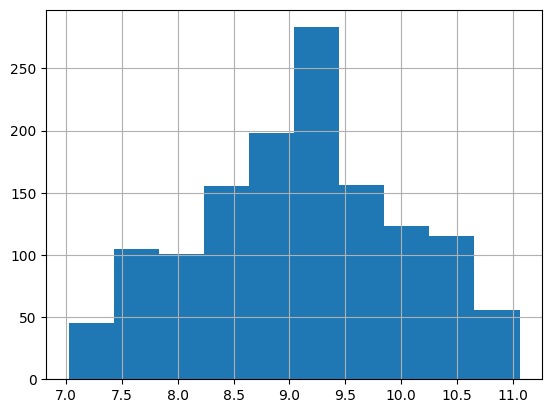

In [ ]:
%matplotlib inline
medical_insurance['charges'] = pd.to_numeric(medical_insurance['charges'], errors='coerce')
medical_insurance['log_charges'] = np.log(medical_insurance['charges'])
medical_insurance['log_charges'].hist()


The logarithm of charges is required in order to have a good visual representation.

# 5. Data exploration at a basic level

In [ ]:
medical_insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1337 non-null   int64  
 1   sex          1337 non-null   object 
 2   bmi          1337 non-null   float64
 3   children     1337 non-null   int64  
 4   smoker       1337 non-null   object 
 5   region       1337 non-null   object 
 6   charges      1337 non-null   float64
 7   log_charges  1337 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 94.0+ KB


In [ ]:
medical_insurance.describe()

,age,bmi,children,charges,log_charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,9.099928
std,14.044333,6.100468,1.205571,12110.359656,0.918699
min,18.000000,15.960000,0.000000,1121.873900,7.022756
25%,27.000000,26.290000,0.000000,4746.344000,8.465130
50%,39.000000,30.400000,1.000000,9386.161300,9.146992
75%,51.000000,34.700000,2.000000,16657.717450,9.720629
max,64.000000,53.130000,5.000000,63770.428010,11.063045


In [ ]:
medical_insurance.nunique()

age              47
sex               2
bmi             548
children          6
smoker            2
region            4
charges        1337
log_charges    1337
dtype: int64

Observations from basic data analysis (step 5)

The columns selected are:

Age - continuous

Sex - categorical

BMI - continuous

Children - categorical

Smoker - categorical

Region - categorical

Charges - continuous (This is the target variable needed to be predicted by the regression model)


# 6. Identifying and rejecting unwanted columns

No columns were removed at this stage

# 7. 	Visual Exploratory Data Analysis of data (with Histograms and Barcharts)

In [ ]:
def PlotBarCharts (inpData, colsToPlot):
  %matplotlib inline

  import matplotlib.pyplot as plt

  fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
  fig.suptitle('Bar charts of: '+ str(colsToPlot))
  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])




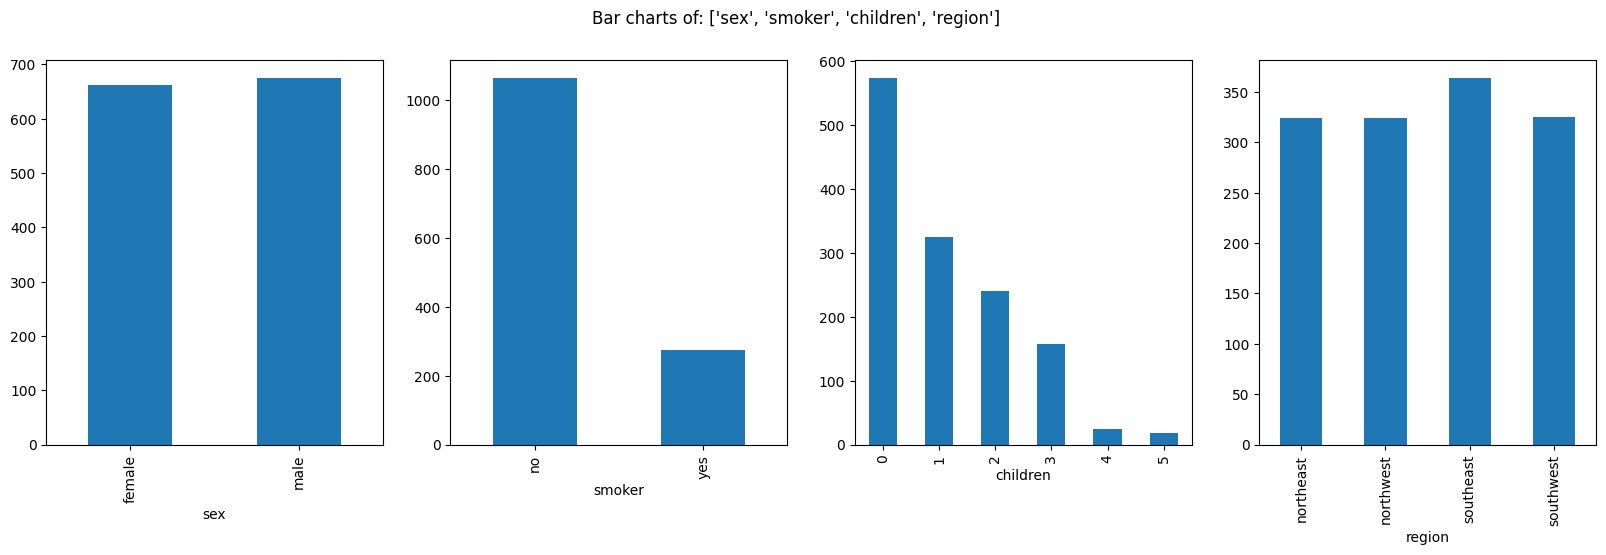

In [ ]:
PlotBarCharts(inpData=medical_insurance, colsToPlot=['sex','smoker','children','region'])


# Visualize distribution of all the Continuous Predictor variables in the data using histograms



array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>]],
      dtype=object)

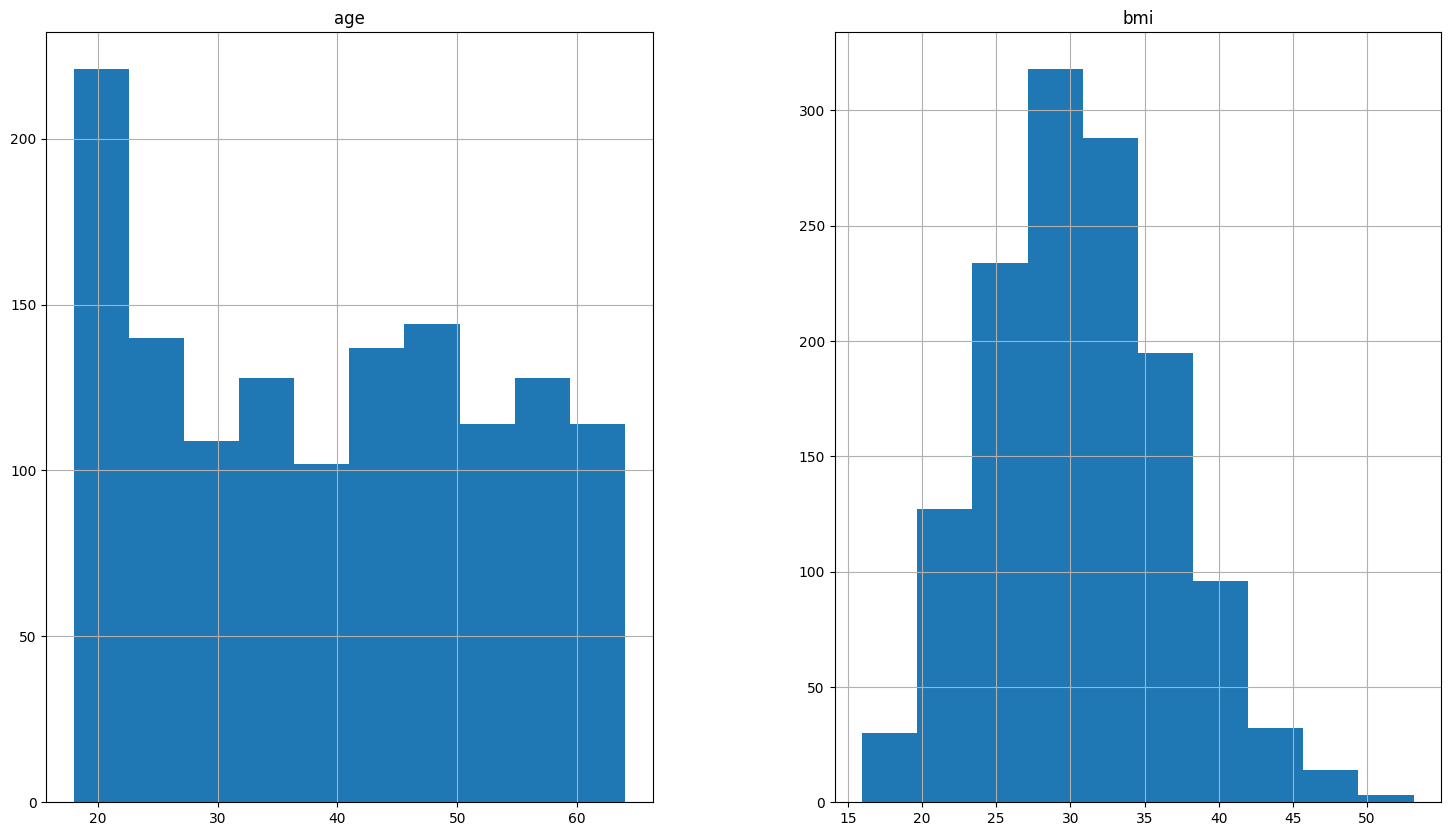

In [ ]:
medical_insurance.hist(['age', 'bmi'], figsize=(18,10))


# 8. Feature selection based on data distribution

Age and bmi are selected.

# 9. Removal of outliers and missing values

In [ ]:
medical_insurance.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
log_charges    0
dtype: int64

No missing values in the dataset

# Feature selection

Target variable is continuous hence the following two scenarios need attention:

1. Continuous target variable vs Continuous predictor variable

2. Continuous target variable vs Categorical predictor

# 10. Visual and Statistic Correlation analysis for selection of best features



# i.) Relationship exploration : Continuous vs Continuous

In [ ]:
ContinuousCols = ['age', 'bmi']

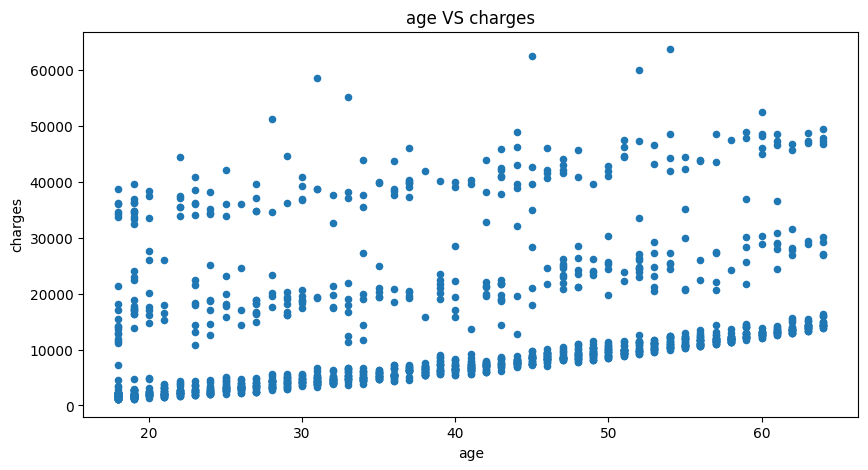

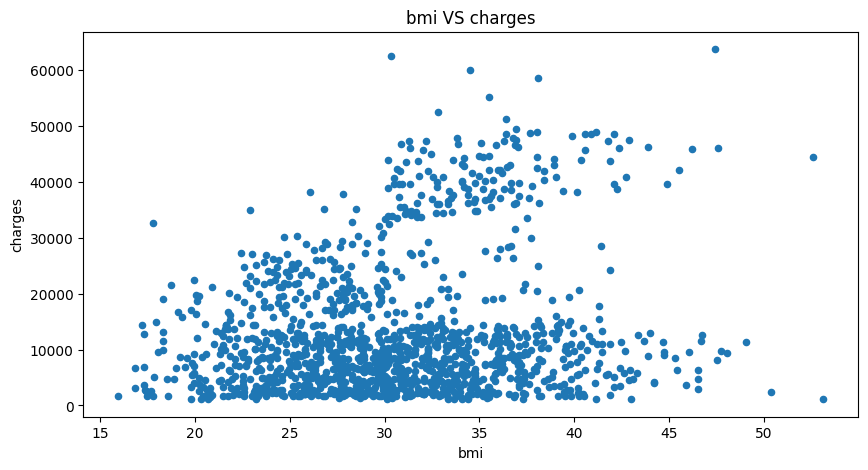

In [ ]:
for predictor in ContinuousCols:
  medical_insurance.plot.scatter(x=predictor, y='charges', figsize=(10,5), title=predictor+" VS "+ 'charges')


# Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [ ]:
ContinuousCols = ['charges','age','bmi']

In [ ]:
CorrelationData=medical_insurance[ContinuousCols].corr()
CorrelationData

,charges,age,bmi
charges,1.000000,0.298308,0.198401
age,0.298308,1.000000,0.109344
bmi,0.198401,0.109344,1.000000


There is moderate correlation between age and the charges while there is a weak correlation between bmi and the charges.

# ii.) Relationship exploration: Continuous vs Categorical

In [ ]:
CategoricalColsList = ['sex','children','smoker','region']

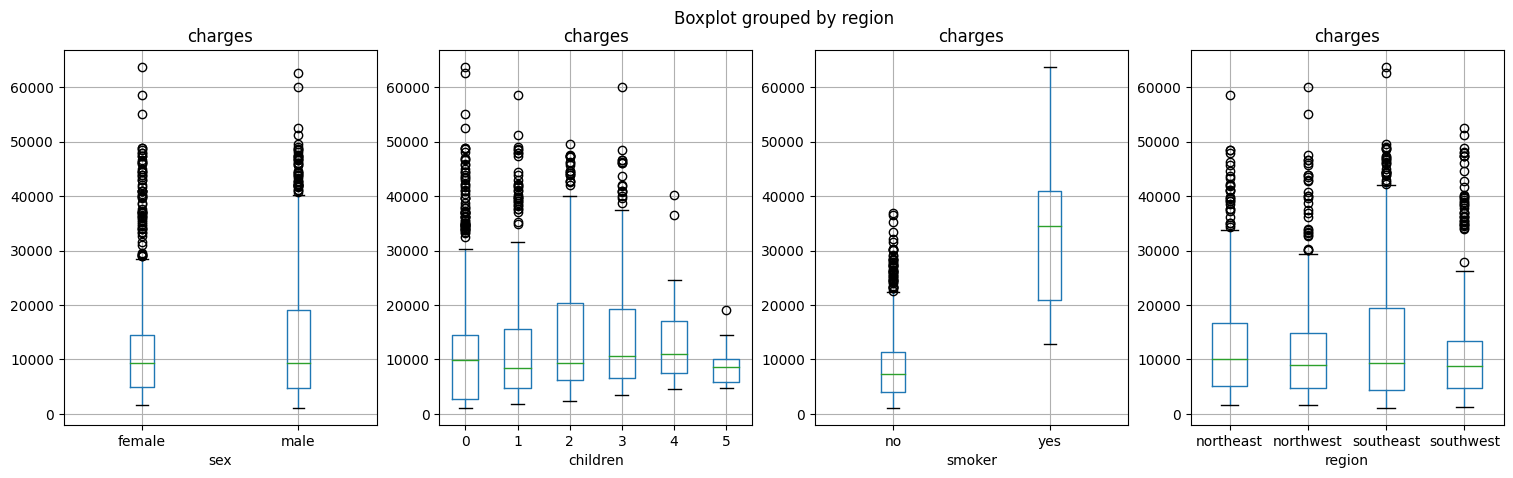

In [ ]:
import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
  medical_insurance.boxplot(column='charges', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Statistical Feature Selection (Continuous Vs Categorical) using ANOVA test

In [ ]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
  from scipy.stats import f_oneway

  SelectedPredictors=[]
  print('##### ANOVA Results ##### \n')
  for predictor in CategoricalPredictorList:
    CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    if (AnovaResults[1] < 0.05):
      print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
      SelectedPredictors.append(predictor)
    else:
      print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
  return(SelectedPredictors)

CategoricalPredictorList=['sex','children','smoker','region']
FunctionAnova(inpData=medical_insurance,
TargetVariable='charges',
CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

sex is correlated with charges | P-Value: 0.033820791995078286
children is correlated with charges | P-Value: 0.006133448188169501
smoker is correlated with charges | P-Value: 1.4067220949358597e-282
region is correlated with charges | P-Value: 0.03276288025444947


['sex', 'children', 'smoker', 'region']

All the categorical variables are connected with the target variable.

It is important to note that whether the individual is a smoker or non-smoker has a very strong impact on their medical charges.

# Selection of final predictors for Machine learning model

The predictors chosen are: age, sex, children, smoker and region.

In [ ]:
SelectedColumns=['age', 'sex', 'children', 'smoker', 'region']

DataForML=medical_insurance[SelectedColumns]
DataForML.head()



,age,sex,children,smoker,region
0,19,female,0,yes,southwest
1,18,male,1,no,southeast
2,28,male,3,no,southeast
3,33,male,0,no,northwest
4,32,male,0,no,northwest


In [ ]:
DataForML.to_pickle('DataForML.pkl')

# 11. Data Conversion to numeric values for machine learning/predictive analysis

In [ ]:
DataForML_Numeric=pd.get_dummies(DataForML)

DataForML_Numeric['charges']=medical_insurance['charges']

DataForML_Numeric()


,age,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,True,False,False,True,False,False,False,True,16884.92400
1,18,1,False,True,True,False,False,False,True,False,1725.55230
2,28,3,False,True,True,False,False,False,True,False,4449.46200
3,33,0,False,True,True,False,False,True,False,False,21984.47061
4,32,0,False,True,True,False,False,True,False,False,3866.85520


In [ ]:
print(DataForML_Numeric.columns)

Index(['age', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'charges'],
      dtype='object')


# 12. Training/Testing Sampling and K-fold cross validation

In [ ]:
TargetVariable='charges'
Predictors=['age','children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


# Standardization and normalisation of the data.

In [ ]:
### Standardization of data ###
from sklearn.preprocessing import MinMaxScaler
PredictorScaler=MinMaxScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(935, 5)
(935,)
(402, 5)
(402,)


# 13. Multiple Linear Regression Algorithm For ML/AI model building

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics

print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
print(TestingDataResults.head())

TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))

  return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.7083726583349442

##### Model Validation and Accuracy Calculations ##########
        age  children  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.673913       0.0         0.0       1.0        1.0         0.0   
1  0.239130       0.8         1.0       0.0        1.0         0.0   
2  0.717391       0.6         1.0       0.0        1.0         0.0   
3  0.282609       0.6         0.0       1.0        0.0         1.0   
4  0.282609       0.4         0.0       1.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               1.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               1.0               0.0               0.0   
3               0.0               1.0               0.0               0.0   
4               0.0               0.0               1.0               0.0   

       

# Decision tree regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.7542397146650696

##### Model Validation and Accuracy Calculations ##########
        age  children  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.673913       0.0         0.0       1.0        1.0         0.0   
1  0.239130       0.8         1.0       0.0        1.0         0.0   
2  0.717391       0.6         1.0       0.0        1.0         0.0   
3  0.282609       0.6         0.0       1.0        0.0         1.0   
4  0.282609       0.4         0.0       1.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               1.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               1.0               0.0               0.0   
3               0.0               1.0               0.0               0.0   
4               0.0               0.0      

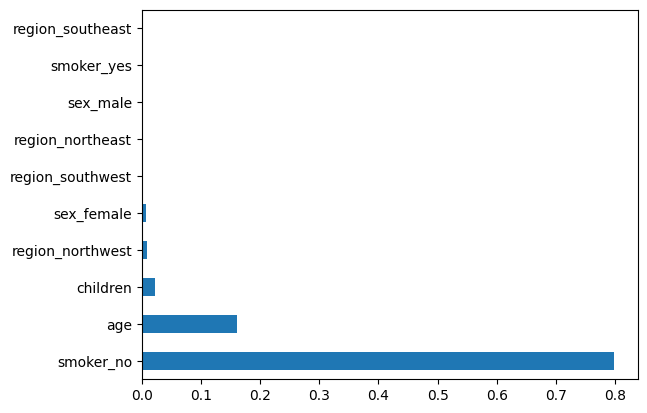

In [ ]:
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Random forest regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.7514183969881739

##### Model Validation and Accuracy Calculations ##########
        age  children  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.673913       0.0         0.0       1.0        1.0         0.0   
1  0.239130       0.8         1.0       0.0        1.0         0.0   
2  0.717391       0.6         1.0       0.0        1.0         0.0   
3  0.282609       0.6         0.0       1.0        0.0         1.0   
4  0.282609       0.4         0.0       1.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               1.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               1.0               0.0               0.0   
3               0.0               1.0               0.0               0.0   
4               0.0      

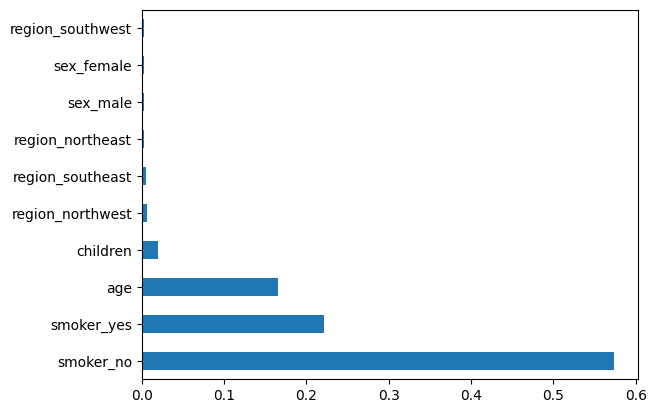

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000
# Printing all the parameters of Random Forest
print(RegModel)
# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# XG Boost regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.7692833374472724

##### Model Validation and Accuracy Calculations ##########
        age  children  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.673913       0.0         0.0       1.0        1.0         0.0   
1  0.239130       

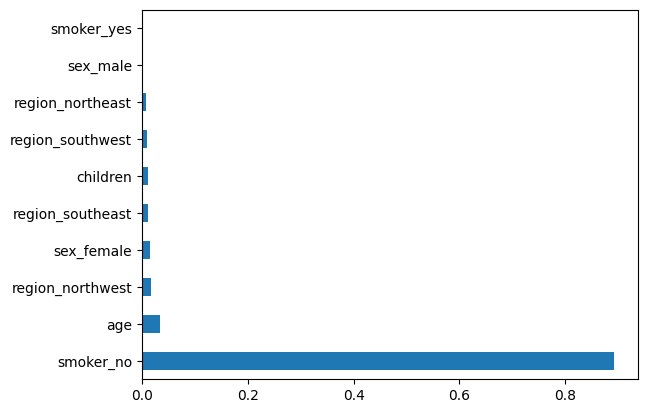

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
learning_rate=0.1,
n_estimators=1000,
objective='reg:linear',
booster='gbtree')
# Printing all the parameters of XGBoost
print(RegModel)
# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# AdaBoost regressor

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.7129238818084291

##### Model Validation and Accuracy Calculations ##########
        age  children  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.673913       0.0         0.0       1.0        1.0         0.0   
1  0.239130       0.8         1.0       0.0        1.0         0.0   
2  0.717391       0.6         1.0       0.0        1.0         0.0   
3  0.282609       0.6         0.0       1.0        0.0         1.0   
4  0.282609       0.4         0.0       1.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               1.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               1.0               0.0               0.0   
3               0.0               1.0               0.0 

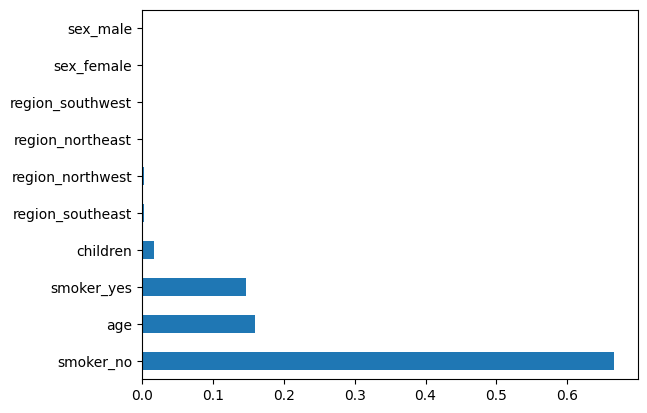

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)
# Printing all the parameters of Adaboost
print(RegModel)
# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# K-Nearest Neighbour (KNN)

In [ ]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)
# Printing all the parameters of KNN
print(RegModel)
# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy

# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.8156964048026308

##### Model Validation and Accuracy Calculations ##########
        age  children  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.673913       0.0         0.0       1.0        1.0         0.0   
1  0.239130       0.8         1.0       0.0        1.0         0.0   
2  0.717391       0.6         1.0       0.0        1.0         0.0   
3  0.282609       0.6         0.0       1.0        0.0         1.0   
4  0.282609       0.4         0.0       1.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               1.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               1.0               0.0               0.0   
3               0.0               1.0               0.0               0.0   
4               0.0               0.0               1.0              

# Support Vector Regression model

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)
# Printing all the parameters
print(RegModel)
# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))
# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  #print('#'*70,'Accuracy:', 100-MAPE)
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: -0.07990824780588013

##### Model Validation and Accuracy Calculations ##########
        age  children  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.673913       0.0         0.0       1.0        1.0         0.0   
1  0.239130       0.8         1.0       0.0        1.0         0.0   
2  0.717391       0.6         1.0       0.0        1.0         0.0   
3  0.282609       0.6         0.0       1.0        0.0         1.0   
4  0.282609       0.4         0.0       1.0        1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               1.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               1.0               0.0               0.0   
3               0.0               1.0               0.0               0.0   
4               0.0               0.0               1.0               0.0   

  

# 14. Selection of the best model

The model selected for the highest accuracy was the KNN model





# 15. Model deployment

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='charges'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['age','sex_female','sex_male','smoker_no','smoker_yes']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1337, 5)
(1337,)


In [ ]:
Final_KNN_Model=RegModel.fit(X,y)

In [ ]:
import pickle
import os

#Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_KNN_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_KNN_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/MyST1_CapstoneProject


# 16. Web deployment

In [ ]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['age'] #,'sex_female','sex_male','smoker_no','smoker_yes']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_KNN_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

In [ ]:
def FunctionGeneratePrediction(inp_age , inp_sex_female, inp_sex_male, inp_smoker_no, inp_smoker_yes):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_age , inp_sex_female, inp_sex_male, inp_smoker_no, inp_smoker_yes]],
     columns=['age','sex_female','sex_male','smoker_no','smoker_yes'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_age = 30, inp_sex_female=False, inp_sex_male=True, inp_smoker_no=True, inp_smoker_yes=False)


'{"Prediction":{"0":9563.164780099}}'

In [ ]:
!pip install flask

In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [ ]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        age_value = float(request.args.get('age'))
        sex_female_value=bool(request.args.get('sex_female'))
        sex_male_value=bool(request.args.get('sex_male'))
        smoker_no_value=bool(request.args.get('smoker_no'))
        smoker_yes_value=bool(request.args.get('smoker_yes'))

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_age=age_value,
                                                       inp_sex_female=sex_female_value,
                                                       inp_sex_male=sex_male_value,
                                                       inp_smoker_no=smoker_no_value,
                                                       inp_smoker_yes=smoker_yes_value
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

In [ ]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit
